In [1]:
#CHARUDEVE KS 
#RA2011026020139

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Preprocessing 
from sklearn import preprocessing

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ignore Warning 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the data
df = pd.read_excel("Assignment- Membership woes.xlsx")
df.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN


In [4]:
# find the number of unique values in the column
df['MEMBERSHIP_TERM_YEARS'].nunique()

92

In [5]:
# find the number of unique values in the column
df['ANNUAL_FEES'].nunique()

3168

In [6]:
# finds the number of  unique values in the column
df['MEMBER_MARITAL_STATUS'].nunique()

4

In [7]:
# prints all unique values in the column
df['MEMBER_MARITAL_STATUS'].unique()

array(['M', nan, 'S', 'W', 'D'], dtype=object)

In [8]:
# creates map for encoding
mms_map = {"M": 0, "S": 1, "W": 2, "D": 3}

# Replace missing values with a placeholder (e.g., -1)
df['MEMBER_MARITAL_STATUS'] = df['MEMBER_MARITAL_STATUS'].replace(np.NaN, -1)

# Map the values using the updated dictionary
df['MEMBER_MARITAL_STATUS'] = df['MEMBER_MARITAL_STATUS'].map(mms_map)

In [9]:
# finds the number of unique value in the column
df['MEMBER_GENDER'].nunique()

2

In [10]:
# prints the unique values in the column
df['MEMBER_GENDER'].unique()

array(['M', nan, 'F'], dtype=object)

In [11]:
# creates map for encoding
gender_map = {
    'M': 0,
    'F': 1,
    np.nan: 2  # You can choose any other numerical value for NaN
}

# Map the values using the dictionary
df['MEMBER_GENDER'] = df['MEMBER_GENDER'].map(gender_map)


In [12]:
# finds the number of unique values in the column
df['MEMBER_ANNUAL_INCOME'].nunique()

798

In [13]:
# finds the number of unique values in the column
df['MEMBER_OCCUPATION_CD'].nunique()

6

In [14]:
# prints the unique values in the column
df['MEMBER_OCCUPATION_CD'].unique()

array([ 1.,  4.,  5.,  6., nan,  2.,  3.])

In [15]:
# creates map for encoding
occupation_map = {1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3, 5.0: 4, 6.0: 5, np.nan: -1}

# Replace missing values with a placeholder (e.g., -1)
df['MEMBER_OCCUPATION_CD'] = df['MEMBER_OCCUPATION_CD'].replace(np.nan, -1)

# Map the values using the updated dictionary
df['MEMBER_OCCUPATION_CD'] = df['MEMBER_OCCUPATION_CD'].map(occupation_map)


In [16]:
# finds the number of unique elements in the column
df['MEMBERSHIP_PACKAGE'].nunique()

2

In [17]:
# prints unique values in the column
df['MEMBERSHIP_PACKAGE'].unique()

array(['TYPE-B', 'TYPE-A'], dtype=object)

In [18]:
# created map for encoding
package_map = {'TYPE-A': 0, 'TYPE-B': 1}

# Map the values using the dictionary
df['MEMBERSHIP_PACKAGE'] = df['MEMBERSHIP_PACKAGE'].map(package_map)


In [19]:
# finds the number of unique value in the column
df['MEMBER_AGE_AT_ISSUE'].nunique()

89

In [20]:
# finds the number of unique values in the column
df['ADDITIONAL_MEMBERS'].nunique()

4

In [21]:
# prints unique values in the column
df['ADDITIONAL_MEMBERS'].unique()

array([2, 3, 1, 0], dtype=int64)

In [22]:
# finds the number of unique values in the column
df['PAYMENT_MODE'].nunique()

5

In [23]:
# prints unique values in the column
df['PAYMENT_MODE'].unique()

array(['ANNUAL', 'QUARTERLY', 'MONTHLY', 'SEMI-ANNUAL', 'SINGLE-PREMIUM'],
      dtype=object)

In [24]:
# creates map for encoding
payment_mode_map = {
    'ANNUAL': 0,
    'QUARTERLY': 1,
    'MONTHLY': 2,
    'SEMI-ANNUAL': 3,
    'SINGLE-PREMIUM': 4
}

# Map the values using the dictionary
df['PAYMENT_MODE'] = df['PAYMENT_MODE'].map(payment_mode_map)


In [25]:
# finds the number of unique values in the column
df['AGENT_CODE'].nunique()

4317

In [26]:
# finds the number of unique values in the column
df['MEMBERSHIP_STATUS'].nunique()

2

In [27]:
#printes unique values in the column
df['MEMBERSHIP_STATUS'].unique()

array(['INFORCE', 'CANCELLED'], dtype=object)

In [28]:
# creates map for encoding
membership_status_map = {
    'INFORCE': 0,
    'CANCELLED': 1
}

# Map the values using the dictionary
df['MEMBERSHIP_STATUS'] = df['MEMBERSHIP_STATUS'].map(membership_status_map)


In [29]:
# finds the number of  unique values in the column
df['START_DATE (YYYYMMDD)'].nunique()

1300

In [30]:
# finds the number of unique values in the column
df['END_DATE  (YYYYMMDD)'].nunique()

1061

In [ ]:
#After exploring the data let's preprocess with needed column.

In [31]:
# preprocessing the data
le1 = preprocessing.LabelEncoder()
df['MEMBERSHIP_STATUS']= le1.fit_transform(df['MEMBERSHIP_STATUS'])
df['PAYMENT_MODE']= le1.fit_transform(df['PAYMENT_MODE'])
df['ADDITIONAL_MEMBERS']= le1.fit_transform(df['ADDITIONAL_MEMBERS'])
df['MEMBERSHIP_PACKAGE']= le1.fit_transform(df['MEMBERSHIP_PACKAGE'])
df['MEMBER_OCCUPATION_CD']= le1.fit_transform(df['MEMBER_OCCUPATION_CD'])
df['MEMBER_MARITAL_STATUS']= le1.fit_transform(df['MEMBER_MARITAL_STATUS'])


In [32]:
# prints the dataset (to check the changes) 
df.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,0,0,25200000.0,0,1,45,2,0,477,0,20060914,NaN
1,A00002,38,112220.0,0,0,10339200.0,0,1,36,3,1,255,0,20061102,NaN
2,A00003,12,100000.0,0,0,14400000.0,0,1,42,1,0,7866,0,20070124,NaN
3,A00004,12,100000.0,0,0,9000000.0,0,1,39,2,0,200533,0,20070122,NaN
4,A00005,46,100000.0,0,0,4800000.0,0,1,27,2,1,6988,0,20070131,NaN


In [33]:
# prints the length of dataset
len(df)

10362

In [ ]:
# Let's plot the graph to explore more to find accurate values.

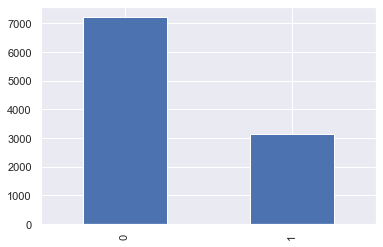

In [34]:
# plot a bar graph (x-axis - values, y-axis - freq of values)
df["MEMBERSHIP_STATUS"].value_counts().plot(kind="bar");

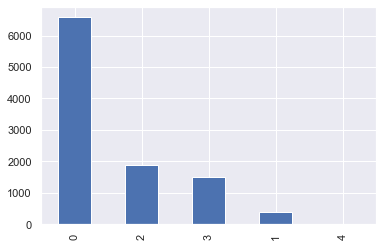

In [35]:
# plot a bar graph (x-axis - values, y-axis - freq of values)
df["PAYMENT_MODE"].value_counts().plot(kind="bar");

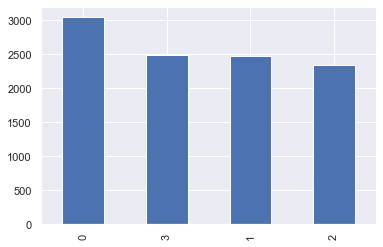

In [36]:
# plot a bar graph (x-axis - values, y-axis - freq of values)
df["ADDITIONAL_MEMBERS"].value_counts().plot(kind="bar");

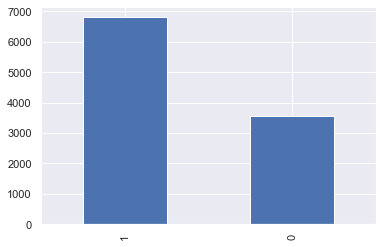

In [37]:
# plot a bar graph (x-axis - values, y-axis - freq of values)
df["MEMBERSHIP_PACKAGE"].value_counts().plot(kind="bar");

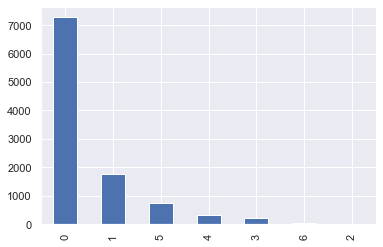

In [38]:
# plot a bar graph (x-axis - values, y-axis - freq of values)
df["MEMBER_OCCUPATION_CD"].value_counts().plot(kind="bar");

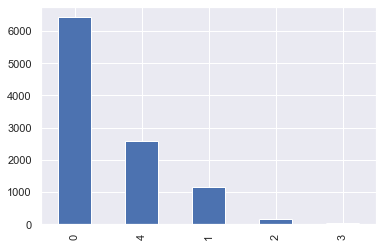

In [39]:
# plot a bar graph (x-axis - values, y-axis - freq of values)
df["MEMBER_MARITAL_STATUS"].value_counts().plot(kind="bar");

In [ ]:
# Uho! 'AGENT_CODE' is in string dtype  let's convert it to int

In [40]:
# convert AGENT_CODE to numeric (assuming it contains only numbers)
df['AGENT_CODE'] = pd.to_numeric(df['AGENT_CODE'], errors='coerce')

# if you want to convert to int (removing NaN values)
df['AGENT_CODE'] = df['AGENT_CODE'].astype('Int64')


In [41]:
# to check the dtype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      10362 non-null  object 
 1   MEMBERSHIP_TERM_YEARS  10362 non-null  int64  
 2   ANNUAL_FEES            10362 non-null  float64
 3   MEMBER_MARITAL_STATUS  10362 non-null  int64  
 4   MEMBER_GENDER          10362 non-null  int64  
 5   MEMBER_ANNUAL_INCOME   8608 non-null   float64
 6   MEMBER_OCCUPATION_CD   10362 non-null  int64  
 7   MEMBERSHIP_PACKAGE     10362 non-null  int64  
 8   MEMBER_AGE_AT_ISSUE    10362 non-null  int64  
 9   ADDITIONAL_MEMBERS     10362 non-null  int64  
 10  PAYMENT_MODE           10362 non-null  int64  
 11  AGENT_CODE             10361 non-null  Int64  
 12  MEMBERSHIP_STATUS      10362 non-null  int64  
 13  START_DATE (YYYYMMDD)  10362 non-null  int64  
 14  END_DATE  (YYYYMMDD)   3143 non-null   float64
dtypes:

In [42]:
# checks the null values
df.isna().sum()

MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS       0
MEMBER_GENDER               0
MEMBER_ANNUAL_INCOME     1754
MEMBER_OCCUPATION_CD        0
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  1
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     7219
dtype: int64

In [43]:
# generates statistical summary
df.describe()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
count,10362.000000,1.036200e+04,10362.000000,10362.000000,8.608000e+03,10362.000000,10362.000000,10362.000000,10362.000000,10362.000000,1.036100e+04,10362.000000,1.036200e+04,3.143000e+03
mean,29.395001,1.788122e+05,1.154121,0.351573,1.451100e+06,0.732967,0.657113,46.798494,1.412276,0.836422,7.142788e+05,0.303320,2.010828e+07,2.011390e+07
std,22.427712,2.688747e+05,1.698284,0.588161,1.757174e+07,1.490248,0.474697,13.897085,1.145136,1.172578,4.355170e+05,0.459714,1.719666e+04,1.378483e+04
min,9.000000,0.000000e+00,0.000000,0.000000,9.996000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.550000e+02,0.000000,2.006091e+07,2.007083e+07
25%,12.000000,1.000000e+05,0.000000,0.000000,3.999960e+05,0.000000,0.000000,37.000000,0.000000,0.000000,3.433440e+05,0.000000,2.009123e+07,2.010122e+07
50%,19.000000,1.182093e+05,0.000000,0.000000,5.499960e+05,0.000000,1.000000,46.000000,1.000000,0.000000,6.877330e+05,0.000000,2.010123e+07,2.011113e+07
75%,37.000000,1.900000e+05,4.000000,1.000000,9.999960e+05,1.000000,1.000000,57.000000,2.000000,2.000000,1.144166e+06,1.000000,2.012123e+07,2.013012e+07
max,102.000000,1.010000e+07,4.000000,2.000000,1.000000e+09,6.000000,1.000000,92.000000,3.000000,4.000000,1.491111e+06,1.000000,2.013113e+07,2.013112e+07


In [ ]:
# Dealing NULL VALUES!

In [44]:
# fills the null values in the column
df['MEMBER_ANNUAL_INCOME'].fillna(df['MEMBER_ANNUAL_INCOME'].mean(), inplace=True)
df['MEMBER_OCCUPATION_CD'].fillna(df['MEMBER_OCCUPATION_CD'].mean(), inplace=True)


In [45]:
# fills the null values in the column
df['MEMBER_MARITAL_STATUS'].fillna(df['MEMBER_MARITAL_STATUS'].mode()[0], inplace=True)
df['MEMBER_GENDER'].fillna(df['MEMBER_GENDER'].mode()[0], inplace=True)


In [46]:
# fills the null values in the column
df['END_DATE  (YYYYMMDD)'].fillna(method='ffill', inplace=True)  # Forward fill



In [47]:
# fills the null values in the column
df['END_DATE  (YYYYMMDD)'].fillna(0, inplace=True)  # Assuming 0 is a suitable constant value


In [48]:
# checks null values
df.isna().sum()

MEMBERSHIP_NUMBER        0
MEMBERSHIP_TERM_YEARS    0
ANNUAL_FEES              0
MEMBER_MARITAL_STATUS    0
MEMBER_GENDER            0
MEMBER_ANNUAL_INCOME     0
MEMBER_OCCUPATION_CD     0
MEMBERSHIP_PACKAGE       0
MEMBER_AGE_AT_ISSUE      0
ADDITIONAL_MEMBERS       0
PAYMENT_MODE             0
AGENT_CODE               1
MEMBERSHIP_STATUS        0
START_DATE (YYYYMMDD)    0
END_DATE  (YYYYMMDD)     0
dtype: int64

In [49]:
# to check the dtype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      10362 non-null  object 
 1   MEMBERSHIP_TERM_YEARS  10362 non-null  int64  
 2   ANNUAL_FEES            10362 non-null  float64
 3   MEMBER_MARITAL_STATUS  10362 non-null  int64  
 4   MEMBER_GENDER          10362 non-null  int64  
 5   MEMBER_ANNUAL_INCOME   10362 non-null  float64
 6   MEMBER_OCCUPATION_CD   10362 non-null  int64  
 7   MEMBERSHIP_PACKAGE     10362 non-null  int64  
 8   MEMBER_AGE_AT_ISSUE    10362 non-null  int64  
 9   ADDITIONAL_MEMBERS     10362 non-null  int64  
 10  PAYMENT_MODE           10362 non-null  int64  
 11  AGENT_CODE             10361 non-null  Int64  
 12  MEMBERSHIP_STATUS      10362 non-null  int64  
 13  START_DATE (YYYYMMDD)  10362 non-null  int64  
 14  END_DATE  (YYYYMMDD)   10362 non-null  float64
dtypes:

In [50]:
# to check the updates
df.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,0,0,25200000.0,0,1,45,2,0,477,0,20060914,0.0
1,A00002,38,112220.0,0,0,10339200.0,0,1,36,3,1,255,0,20061102,0.0
2,A00003,12,100000.0,0,0,14400000.0,0,1,42,1,0,7866,0,20070124,0.0
3,A00004,12,100000.0,0,0,9000000.0,0,1,39,2,0,200533,0,20070122,0.0
4,A00005,46,100000.0,0,0,4800000.0,0,1,27,2,1,6988,0,20070131,0.0


In [ ]:
# Plotting cross tabs to compare between columns.

In [51]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["PAYMENT_MODE"])

PAYMENT_MODE,0,1,2,3,4
MEMBERSHIP_STATUS,,,,,
0,4692,236,1319,963,9
1,1897,154,562,530,0


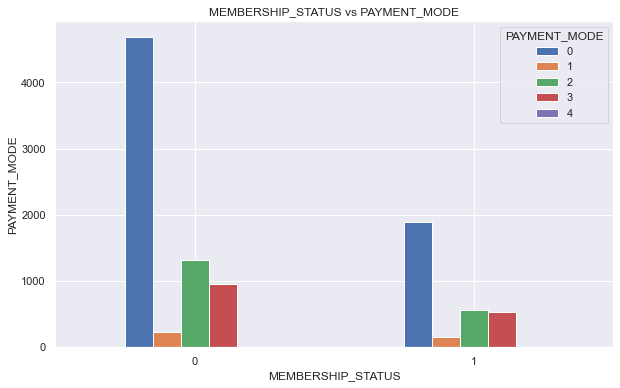

In [52]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["PAYMENT_MODE"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("MEMBERSHIP_STATUS vs PAYMENT_MODE")
plt.xlabel("MEMBERSHIP_STATUS")
plt.ylabel("PAYMENT_MODE")
plt.xticks(rotation=0);

In [53]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["ADDITIONAL_MEMBERS"])

ADDITIONAL_MEMBERS,0,1,2,3
MEMBERSHIP_STATUS,,,,
0,2106,1700,1642,1771
1,944,778,704,717


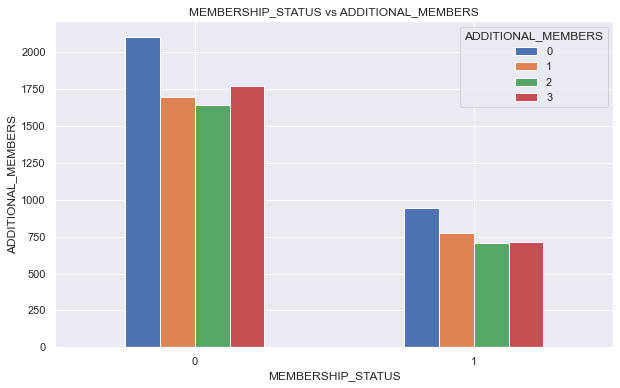

In [54]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["ADDITIONAL_MEMBERS"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("MEMBERSHIP_STATUS vs ADDITIONAL_MEMBERS")
plt.xlabel("MEMBERSHIP_STATUS")
plt.ylabel("ADDITIONAL_MEMBERS")
plt.xticks(rotation=0);

In [55]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["MEMBERSHIP_PACKAGE"])

MEMBERSHIP_PACKAGE,0,1
MEMBERSHIP_STATUS,,
0,2962,4257
1,591,2552


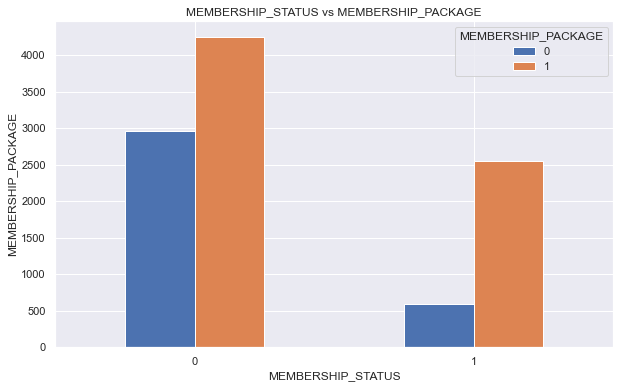

In [56]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["MEMBERSHIP_PACKAGE"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("MEMBERSHIP_STATUS vs MEMBERSHIP_PACKAGE")
plt.xlabel("MEMBERSHIP_STATUS")
plt.ylabel("MEMBERSHIP_PACKAGE")
plt.xticks(rotation=0);

In [57]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["MEMBER_OCCUPATION_CD"])

MEMBER_OCCUPATION_CD,0,1,2,3,4,5,6
MEMBERSHIP_STATUS,,,,,,,
0,4895,1336,0,153,223,577,35
1,2386,442,1,54,101,151,8


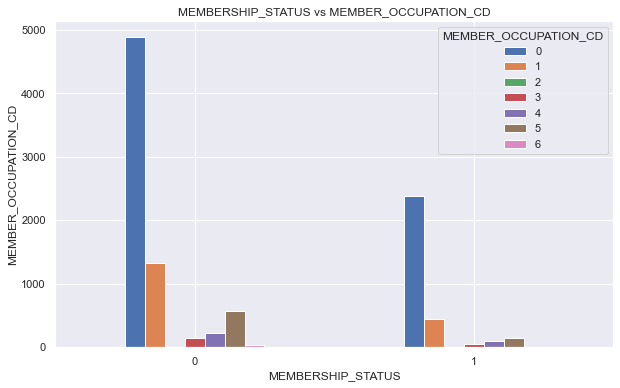

In [58]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["MEMBER_OCCUPATION_CD"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("MEMBERSHIP_STATUS vs MEMBER_OCCUPATION_CD")
plt.xlabel("MEMBERSHIP_STATUS")
plt.ylabel("MEMBER_OCCUPATION_CD")
plt.xticks(rotation=0);

In [59]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["MEMBER_MARITAL_STATUS"])

MEMBER_MARITAL_STATUS,0,1,2,3,4
MEMBERSHIP_STATUS,,,,,
0,4440,723,111,36,1909
1,1990,421,35,9,688


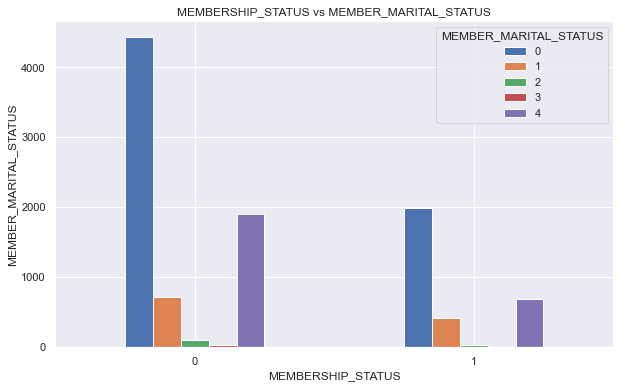

In [60]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_STATUS"], df["MEMBER_MARITAL_STATUS"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("MEMBERSHIP_STATUS vs MEMBER_MARITAL_STATUS")
plt.xlabel("MEMBERSHIP_STATUS")
plt.ylabel("MEMBER_MARITAL_STATUS")
plt.xticks(rotation=0);

In [61]:
# plotting a cross tab
pd.crosstab(df["PAYMENT_MODE"], df["ADDITIONAL_MEMBERS"])

ADDITIONAL_MEMBERS,0,1,2,3
PAYMENT_MODE,,,,
0,2050,1518,1447,1574
1,79,126,90,95
2,517,463,466,435
3,403,369,341,380
4,1,2,2,4


In [62]:
# plotting a cross tab
pd.crosstab(df["PAYMENT_MODE"], df["MEMBERSHIP_PACKAGE"])

MEMBERSHIP_PACKAGE,0,1
PAYMENT_MODE,,
0,2123,4466
1,113,277
2,902,979
3,415,1078
4,0,9


In [63]:
# plotting a cross tab
pd.crosstab(df["PAYMENT_MODE"], df["MEMBER_OCCUPATION_CD"])

MEMBER_OCCUPATION_CD,0,1,2,3,4,5,6
PAYMENT_MODE,,,,,,,
0,4544,1204,0,120,219,470,32
1,301,32,0,13,11,33,0
2,1341,353,1,39,40,105,2
3,1087,189,0,35,54,119,9
4,8,0,0,0,0,1,0


In [64]:
# plotting a cross tab
pd.crosstab(df["PAYMENT_MODE"], df["MEMBER_MARITAL_STATUS"])

MEMBER_MARITAL_STATUS,0,1,2,3,4
PAYMENT_MODE,,,,,
0,3931,664,95,28,1871
1,287,54,3,0,46
2,1224,258,26,13,360
3,980,167,22,4,320
4,8,1,0,0,0


In [65]:
# plotting a cross tab
pd.crosstab(df["ADDITIONAL_MEMBERS"], df["MEMBERSHIP_PACKAGE"])

MEMBERSHIP_PACKAGE,0,1
ADDITIONAL_MEMBERS,,
0,1379,1671
1,730,1748
2,689,1657
3,755,1733


In [66]:
# plotting a cross tab
pd.crosstab(df["ADDITIONAL_MEMBERS"], df["MEMBER_OCCUPATION_CD"])

MEMBER_OCCUPATION_CD,0,1,2,3,4,5,6
ADDITIONAL_MEMBERS,,,,,,,
0,2043,629,0,32,65,263,18
1,1777,384,1,75,83,153,5
2,1683,378,0,58,83,135,9
3,1778,387,0,42,93,177,11


In [67]:
# plotting a cross tab
pd.crosstab(df["ADDITIONAL_MEMBERS"], df["MEMBER_MARITAL_STATUS"])

MEMBER_MARITAL_STATUS,0,1,2,3,4
ADDITIONAL_MEMBERS,,,,,
0,0,1144,146,45,1715
1,2185,0,0,0,293
2,2061,0,0,0,285
3,2184,0,0,0,304


In [68]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_PACKAGE"], df["MEMBER_OCCUPATION_CD"])

MEMBER_OCCUPATION_CD,0,1,2,3,4,5,6
MEMBERSHIP_PACKAGE,,,,,,,
0,1892,1121,1,48,56,415,20
1,5389,657,0,159,268,313,23


In [69]:
# plotting a cross tab
pd.crosstab(df["MEMBERSHIP_PACKAGE"], df["MEMBER_MARITAL_STATUS"])

MEMBER_MARITAL_STATUS,0,1,2,3,4
MEMBERSHIP_PACKAGE,,,,,
0,1744,262,37,22,1488
1,4686,882,109,23,1109


In [70]:
# plotting a cross tab
pd.crosstab(df["MEMBER_OCCUPATION_CD"], df["MEMBER_MARITAL_STATUS"])

MEMBER_MARITAL_STATUS,0,1,2,3,4
MEMBER_OCCUPATION_CD,,,,,
0,4780,925,93,34,1449
1,965,144,22,9,638
2,0,0,0,0,1
3,167,6,7,0,27
4,251,48,2,2,21
5,254,20,20,0,434
6,13,1,2,0,27


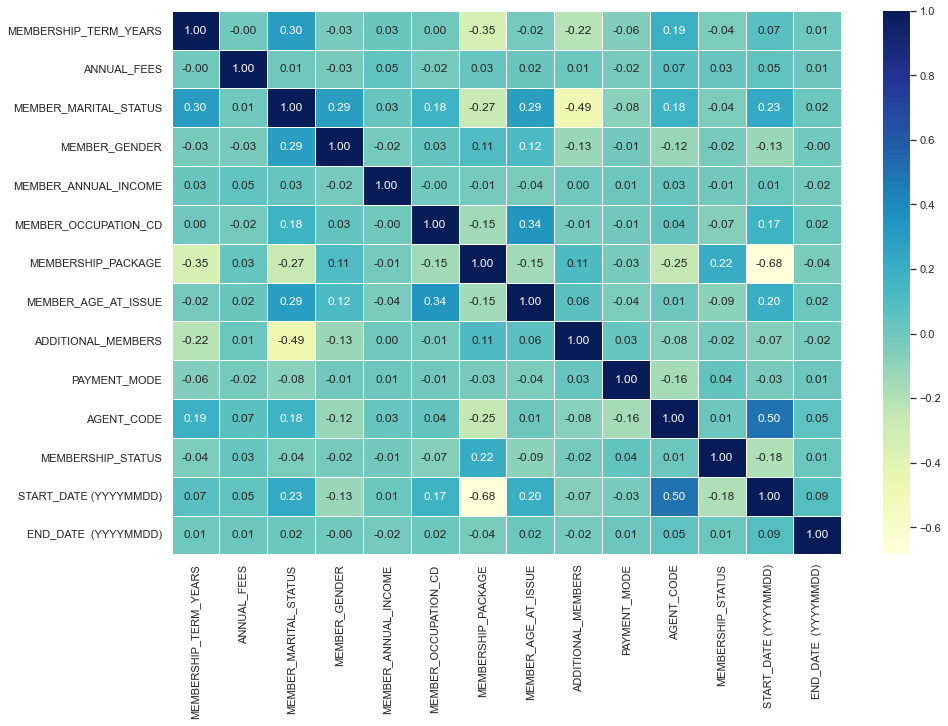

In [71]:
# plots a heatmap visualizing the correlation matrix of numerical columns in the data
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [72]:
# prints the names of the column
print(df.columns)



Index(['MEMBERSHIP_NUMBER', 'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES',
       'MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBER_ANNUAL_INCOME',
       'MEMBER_OCCUPATION_CD', 'MEMBERSHIP_PACKAGE', 'MEMBER_AGE_AT_ISSUE',
       'ADDITIONAL_MEMBERS', 'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS',
       'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)'],
      dtype='object')


In [73]:
# creating categorial_columns
categorical_columns = ['MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBER_OCCUPATION_CD', 'MEMBERSHIP_PACKAGE', 'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS']


In [74]:
# checking datatypes
df.dtypes

MEMBERSHIP_NUMBER         object
MEMBERSHIP_TERM_YEARS      int64
ANNUAL_FEES              float64
MEMBER_MARITAL_STATUS      int64
MEMBER_GENDER              int64
MEMBER_ANNUAL_INCOME     float64
MEMBER_OCCUPATION_CD       int64
MEMBERSHIP_PACKAGE         int64
MEMBER_AGE_AT_ISSUE        int64
ADDITIONAL_MEMBERS         int64
PAYMENT_MODE               int64
AGENT_CODE                 Int64
MEMBERSHIP_STATUS          int64
START_DATE (YYYYMMDD)      int64
END_DATE  (YYYYMMDD)     float64
dtype: object

In [75]:
# converts only numeric columns to float
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].astype(float)


In [76]:
# checks null values
df.isnull().sum()

MEMBERSHIP_NUMBER        0
MEMBERSHIP_TERM_YEARS    0
ANNUAL_FEES              0
MEMBER_MARITAL_STATUS    0
MEMBER_GENDER            0
MEMBER_ANNUAL_INCOME     0
MEMBER_OCCUPATION_CD     0
MEMBERSHIP_PACKAGE       0
MEMBER_AGE_AT_ISSUE      0
ADDITIONAL_MEMBERS       0
PAYMENT_MODE             0
AGENT_CODE               1
MEMBERSHIP_STATUS        0
START_DATE (YYYYMMDD)    0
END_DATE  (YYYYMMDD)     0
dtype: int64

In [77]:
# declaring classes
classes = ["Inforce", "Cancelled"]

In [ ]:
# Let's drop unwanted columns which reduces accuracy of model

In [78]:
# remove leading or trailing whitespaces in column names
df.columns = df.columns.str.strip()

# drop columns
df.drop(['AGENT_CODE', 'MEMBERSHIP_NUMBER','MEMBER_OCCUPATION_CD'], axis=1, inplace=True)


In [ ]:
# Dataset is ready to train & test!

In [79]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(df.drop("MEMBERSHIP_STATUS", axis = 1),
                                                    df["MEMBERSHIP_STATUS"],
                                                    test_size=0.1)

In [ ]:
# Let's try modelling using these models

# Ridge Classifier

# SGD Classifier

# Support Vector Machine

# Decision Trees

# Gradient Boost

# Hist Gradient Boost

# Random Forest

# Catboost

# LGBM - High accuracy

# XGB

In [80]:
# ridge model
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)


RidgeClassifier()

In [81]:
# classification report 
y_pred = ridge_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.70      0.99      0.82       724
         1.0       0.56      0.03      0.05       313

    accuracy                           0.70      1037
   macro avg       0.63      0.51      0.44      1037
weighted avg       0.66      0.70      0.59      1037



In [82]:
# accuracy
accuracy_score(y_test, y_pred)

0.7000964320154291

In [83]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array 

array([[717,   7],
       [304,   9]], dtype=int64)

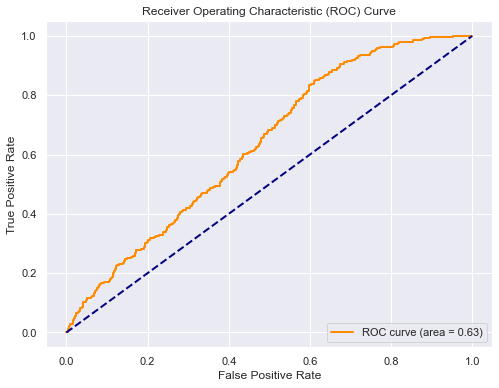

In [84]:
# auc value and roc curve
y_scores = ridge_model.decision_function(X_test)

# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [85]:
# sgdclassifier model
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

SGDClassifier()

In [86]:
# classification report
y_pred = sgd_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82       724
         1.0       1.00      0.00      0.01       313

    accuracy                           0.70      1037
   macro avg       0.85      0.50      0.41      1037
weighted avg       0.79      0.70      0.58      1037



In [87]:
# accuracy
accuracy_score(y_test, y_pred)

0.6991321118611379

In [88]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[724,   0],
       [312,   1]], dtype=int64)

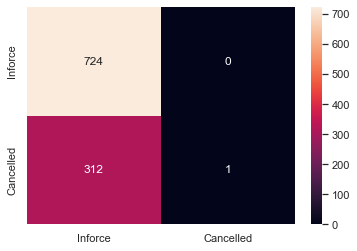

In [89]:
# heat map
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f");

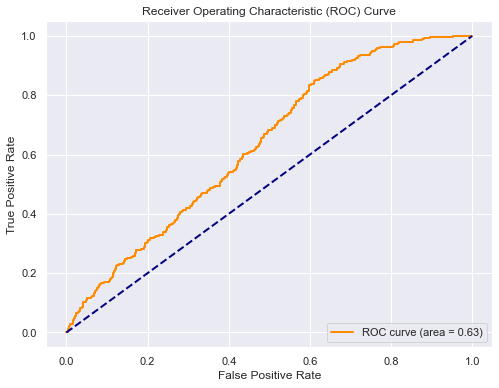

In [90]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [91]:
# svm model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

In [92]:
# classification report
y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82       724
         1.0       0.00      0.00      0.00       313

    accuracy                           0.70      1037
   macro avg       0.35      0.50      0.41      1037
weighted avg       0.49      0.70      0.57      1037



In [93]:
# accuracy
accuracy_score(y_test, y_pred)

0.6981677917068466

In [94]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[724,   0],
       [313,   0]], dtype=int64)

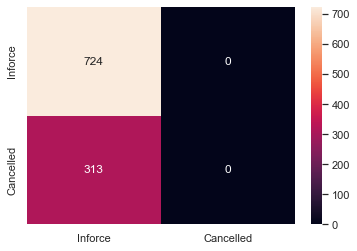

In [95]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f");

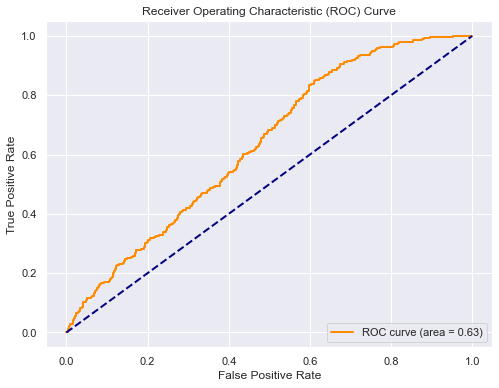

In [96]:
# auc value and roc curve
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [97]:
# decision tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [98]:
# classification report
y_pred = dt_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       724
         1.0       0.56      0.58      0.57       313

    accuracy                           0.74      1037
   macro avg       0.69      0.69      0.69      1037
weighted avg       0.74      0.74      0.74      1037



In [99]:
# accuracy
accuracy_score(y_test, y_pred)

0.7357762777242044

In [100]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array 

array([[583, 141],
       [133, 180]], dtype=int64)

<AxesSubplot:>

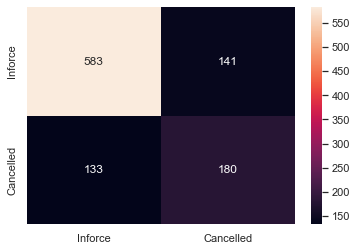

In [101]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

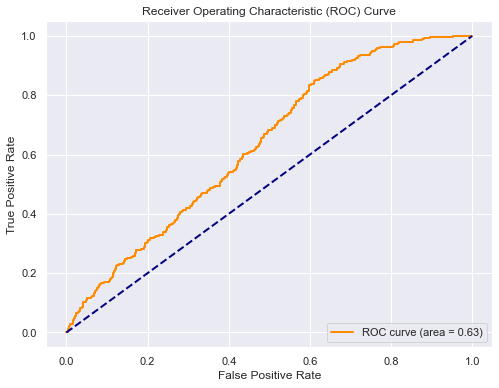

In [102]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [103]:
# gradient boosting classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [104]:
# classification report
y_pred = gb_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83       724
         1.0       0.64      0.35      0.46       313

    accuracy                           0.75      1037
   macro avg       0.70      0.63      0.65      1037
weighted avg       0.73      0.75      0.72      1037



In [105]:
#accuracy
accuracy_score(y_test, y_pred)

0.7454194792671167

In [106]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[662,  62],
       [202, 111]], dtype=int64)

<AxesSubplot:>

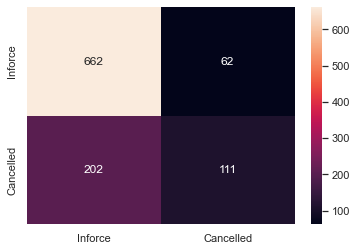

In [107]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

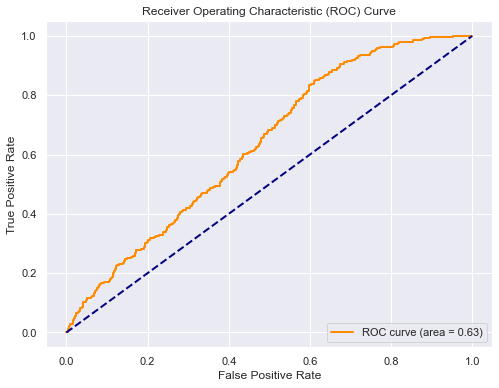

In [108]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [109]:
# histgradientboosting classifier
hgb_model = HistGradientBoostingClassifier()
hgb_model.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [110]:
# classification report
y_pred = hgb_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       724
         1.0       0.68      0.51      0.58       313

    accuracy                           0.78      1037
   macro avg       0.74      0.70      0.72      1037
weighted avg       0.77      0.78      0.77      1037



In [111]:
# accuracy 
accuracy_score(y_test, y_pred)

0.7791706846673095

In [112]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array 

array([[647,  77],
       [152, 161]], dtype=int64)

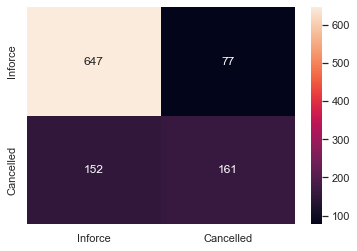

In [113]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f");

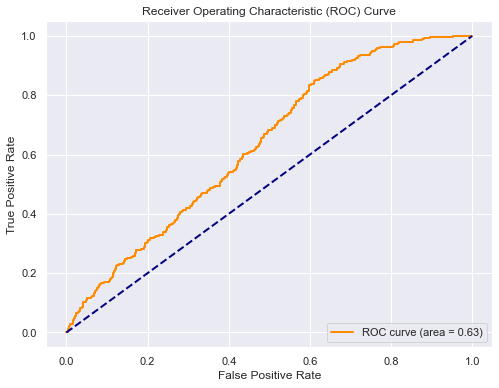

In [114]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [115]:
# random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [116]:
# classification report
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       724
         1.0       0.68      0.47      0.56       313

    accuracy                           0.77      1037
   macro avg       0.74      0.69      0.70      1037
weighted avg       0.76      0.77      0.76      1037



In [117]:
# accuracy 
accuracy_score(y_test, y_pred)

0.7743490838958534

In [118]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[656,  68],
       [166, 147]], dtype=int64)

<AxesSubplot:>

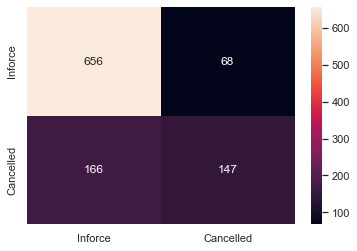

In [119]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

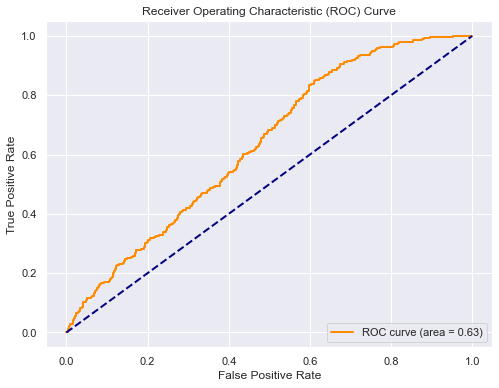

In [120]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [121]:
# catboost model
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

Learning rate set to 0.026728
0:	learn: 0.6807059	total: 121ms	remaining: 2m 1s
1:	learn: 0.6703807	total: 131ms	remaining: 1m 5s
2:	learn: 0.6598887	total: 138ms	remaining: 45.8s
3:	learn: 0.6507063	total: 143ms	remaining: 35.5s
4:	learn: 0.6397895	total: 149ms	remaining: 29.7s
5:	learn: 0.6324047	total: 155ms	remaining: 25.6s
6:	learn: 0.6199221	total: 160ms	remaining: 22.7s
7:	learn: 0.6078926	total: 167ms	remaining: 20.7s
8:	learn: 0.6013786	total: 173ms	remaining: 19s
9:	learn: 0.5956594	total: 179ms	remaining: 17.8s
10:	learn: 0.5897121	total: 186ms	remaining: 16.7s
11:	learn: 0.5844407	total: 192ms	remaining: 15.8s
12:	learn: 0.5799672	total: 201ms	remaining: 15.2s
13:	learn: 0.5752325	total: 209ms	remaining: 14.7s
14:	learn: 0.5684402	total: 218ms	remaining: 14.3s
15:	learn: 0.5654029	total: 227ms	remaining: 13.9s
16:	learn: 0.5614985	total: 237ms	remaining: 13.7s
17:	learn: 0.5568662	total: 246ms	remaining: 13.4s
18:	learn: 0.5509712	total: 254ms	remaining: 13.1s
19:	learn: 0.

In [122]:
# accuracy
accuracy_score(y_test, y_pred)

0.7743490838958534

In [123]:
# classification report 
y_pred = catboost_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       724
         1.0       0.71      0.54      0.61       313

    accuracy                           0.79      1037
   macro avg       0.76      0.72      0.74      1037
weighted avg       0.79      0.79      0.78      1037



In [124]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[655,  69],
       [145, 168]], dtype=int64)

<AxesSubplot:>

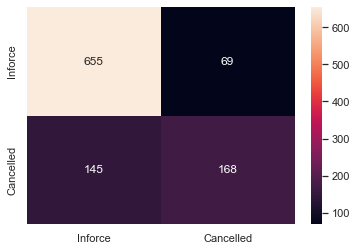

In [125]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

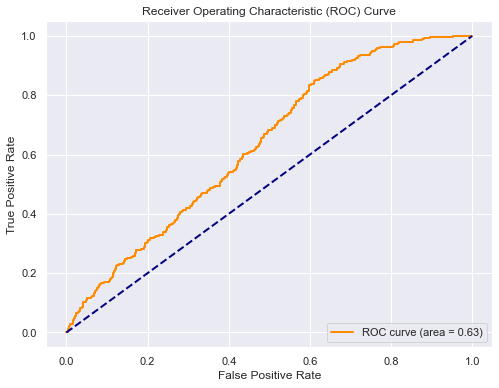

In [126]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [127]:
# lgbmclassifier
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2830, number of negative: 6495
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1205
[LightGBM] [Info] Number of data points in the train set: 9325, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.303485 -> initscore=-0.830756
[LightGBM] [Info] Start training from score -0.830756


LGBMClassifier()

In [128]:
# classification report
y_pred = lgbm_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       724
         1.0       0.69      0.50      0.58       313

    accuracy                           0.78      1037
   macro avg       0.75      0.70      0.72      1037
weighted avg       0.77      0.78      0.77      1037



In [129]:
# accuracy 
accuracy_score(y_test, y_pred)

0.7830279652844745

In [130]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[655,  69],
       [156, 157]], dtype=int64)

<AxesSubplot:>

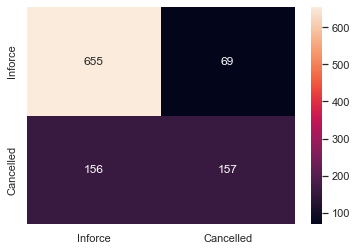

In [131]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

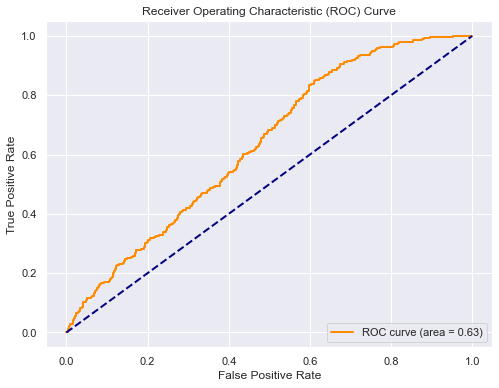

In [132]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [133]:
# xgbclassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [134]:
# classification report
y_pred = xgb_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       724
         1.0       0.66      0.51      0.57       313

    accuracy                           0.77      1037
   macro avg       0.73      0.70      0.71      1037
weighted avg       0.76      0.77      0.76      1037



In [135]:
# accuracy
accuracy_score(y_test, y_pred)

0.7714561234329798

In [136]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[640,  84],
       [153, 160]], dtype=int64)

<AxesSubplot:>

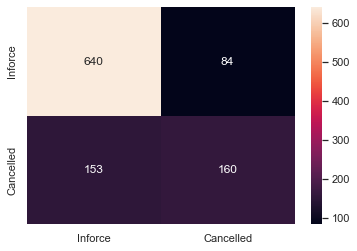

In [137]:
# heat map
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

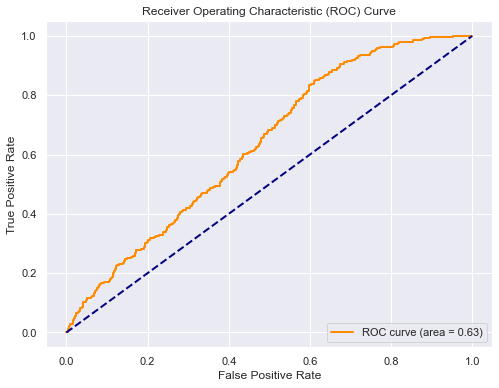

In [138]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [139]:
# logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [140]:
# classification report
y_pred = lr_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.70      0.98      0.82       724
         1.0       0.45      0.05      0.09       313

    accuracy                           0.70      1037
   macro avg       0.58      0.51      0.45      1037
weighted avg       0.63      0.70      0.60      1037



In [141]:
#accuracy
accuracy_score(y_test, y_pred)

0.695274831243973

In [142]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array 

array([[706,  18],
       [298,  15]], dtype=int64)

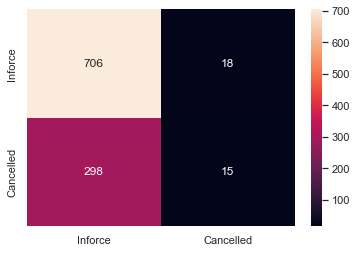

In [143]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f");

In [ ]:
# LGBM had high accuracy compared to other models for the give dataset

In [144]:
# lgbmclassifier
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2830, number of negative: 6495
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1205
[LightGBM] [Info] Number of data points in the train set: 9325, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.303485 -> initscore=-0.830756
[LightGBM] [Info] Start training from score -0.830756


LGBMClassifier()

In [145]:
# classification report
y_pred = lgbm_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       724
         1.0       0.69      0.50      0.58       313

    accuracy                           0.78      1037
   macro avg       0.75      0.70      0.72      1037
weighted avg       0.77      0.78      0.77      1037



In [146]:
# accuracy 
accuracy_score(y_test, y_pred)

0.7830279652844745

In [147]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[655,  69],
       [156, 157]], dtype=int64)

<AxesSubplot:>

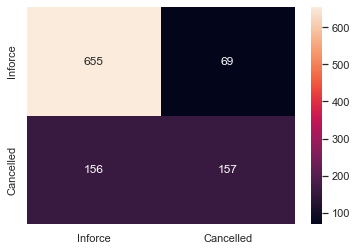

In [148]:
# heatmap
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sns.heatmap(df_cm, annot=True, fmt = ".0f")

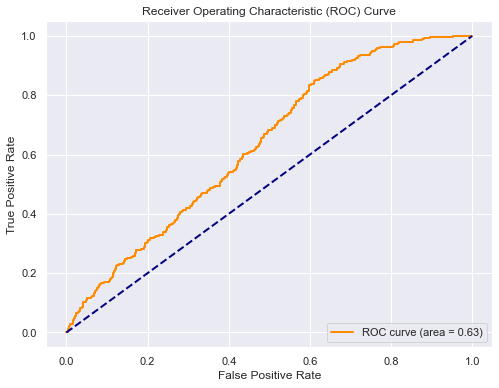

In [149]:
# compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Model is created successfully with the accuracy of 0.78 using LGBMCLASSIFIER()

In [ ]:
# 'MEMBERSHIP_STATUS','PAYMENT_MODE','ADDITIONAL_MEMBERS','MEMBERSHIP_PACKAGE','MEMBER_MARITAL_STATUS' are the columns used in the model for classification. 